In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic-in-all-probability/sample_submission.csv
/kaggle/input/spaceship-titanic-in-all-probability/train.csv
/kaggle/input/spaceship-titanic-in-all-probability/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/spaceship-titanic-in-all-probability/train.csv', index_col = 'PassengerId')
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 950.8+ KB


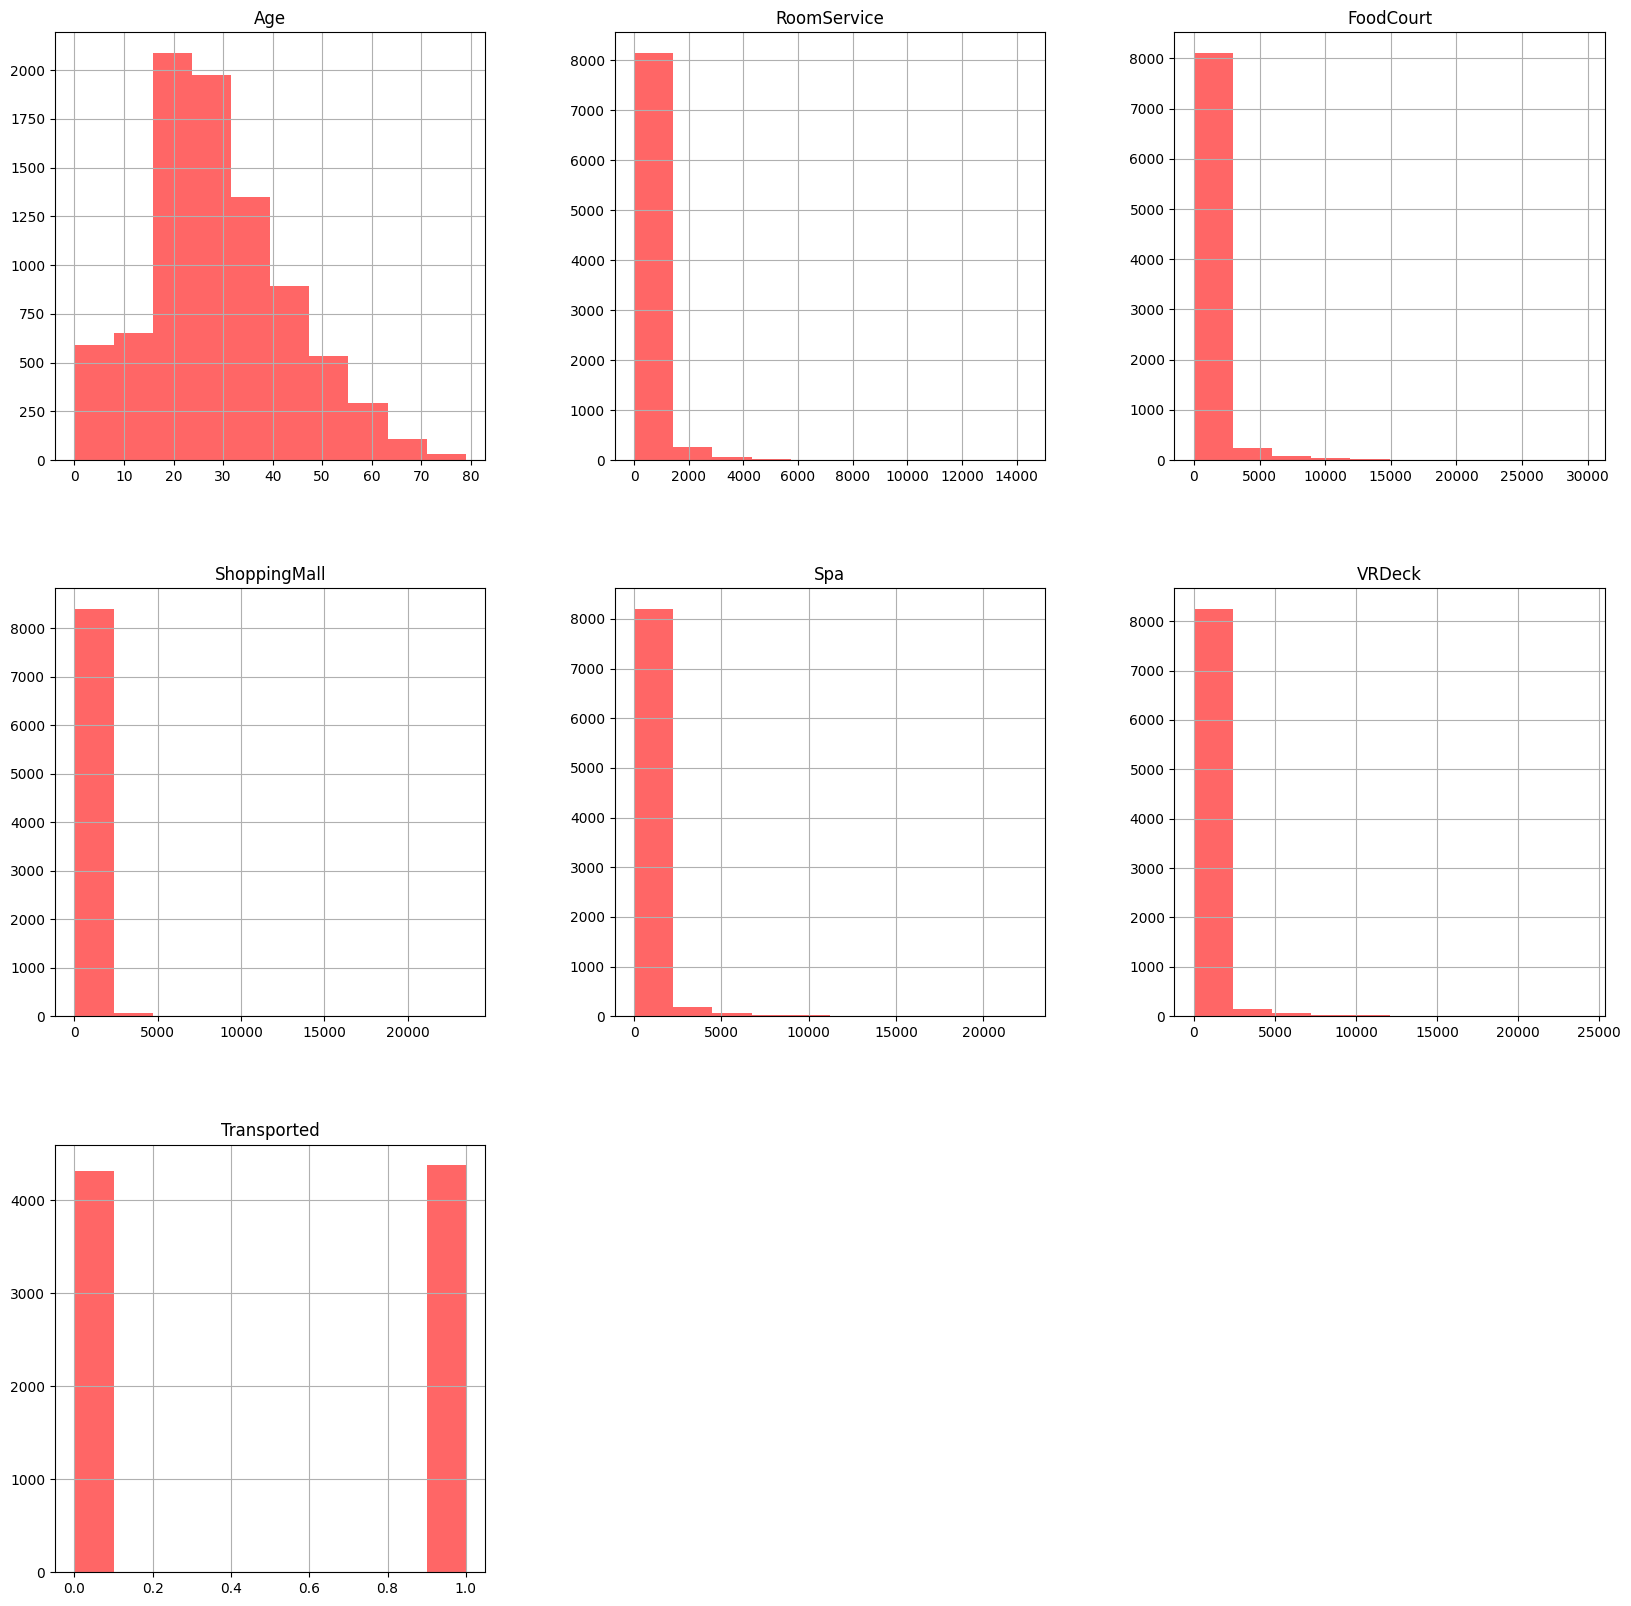

In [5]:
df.hist(figsize = (20, 20), alpha = 0.6, color = 'r');

In [6]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1


In [7]:
# df[['block', 'seat', 'c']] = df['Cabin'].str.split('/', expand = True)
# df = df.drop(['Cabin'], axis = 1)

# Preprocessing 

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# preprocessor = ColumnTransformer(
#     [
#     ('sclaer', MinMaxScaler(), num_cols),
#     ]
#     ,remainder = 'drop'
# )

def preprocessing(df):
    lencoder = LabelEncoder()
    scaler = MinMaxScaler()
    ohe = OneHotEncoder()
    
    df[['block', 'seat', 'c']] = df['Cabin'].str.split('/', expand = True)
    df = df.drop(['Cabin'], axis = 1)
    
    num_cols = ['Age', 'RoomService',
           'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'seat']

    cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'block', 'c']
    
    df[num_cols] = scaler.fit_transform(df[num_cols])

    for i in cat_cols:
        lencoder.fit(df[i])
        df[i] = lencoder.transform(df[i])

    df = df.fillna(df.mean())
    
    return df

In [9]:
df = preprocessing(df)

# Visualization

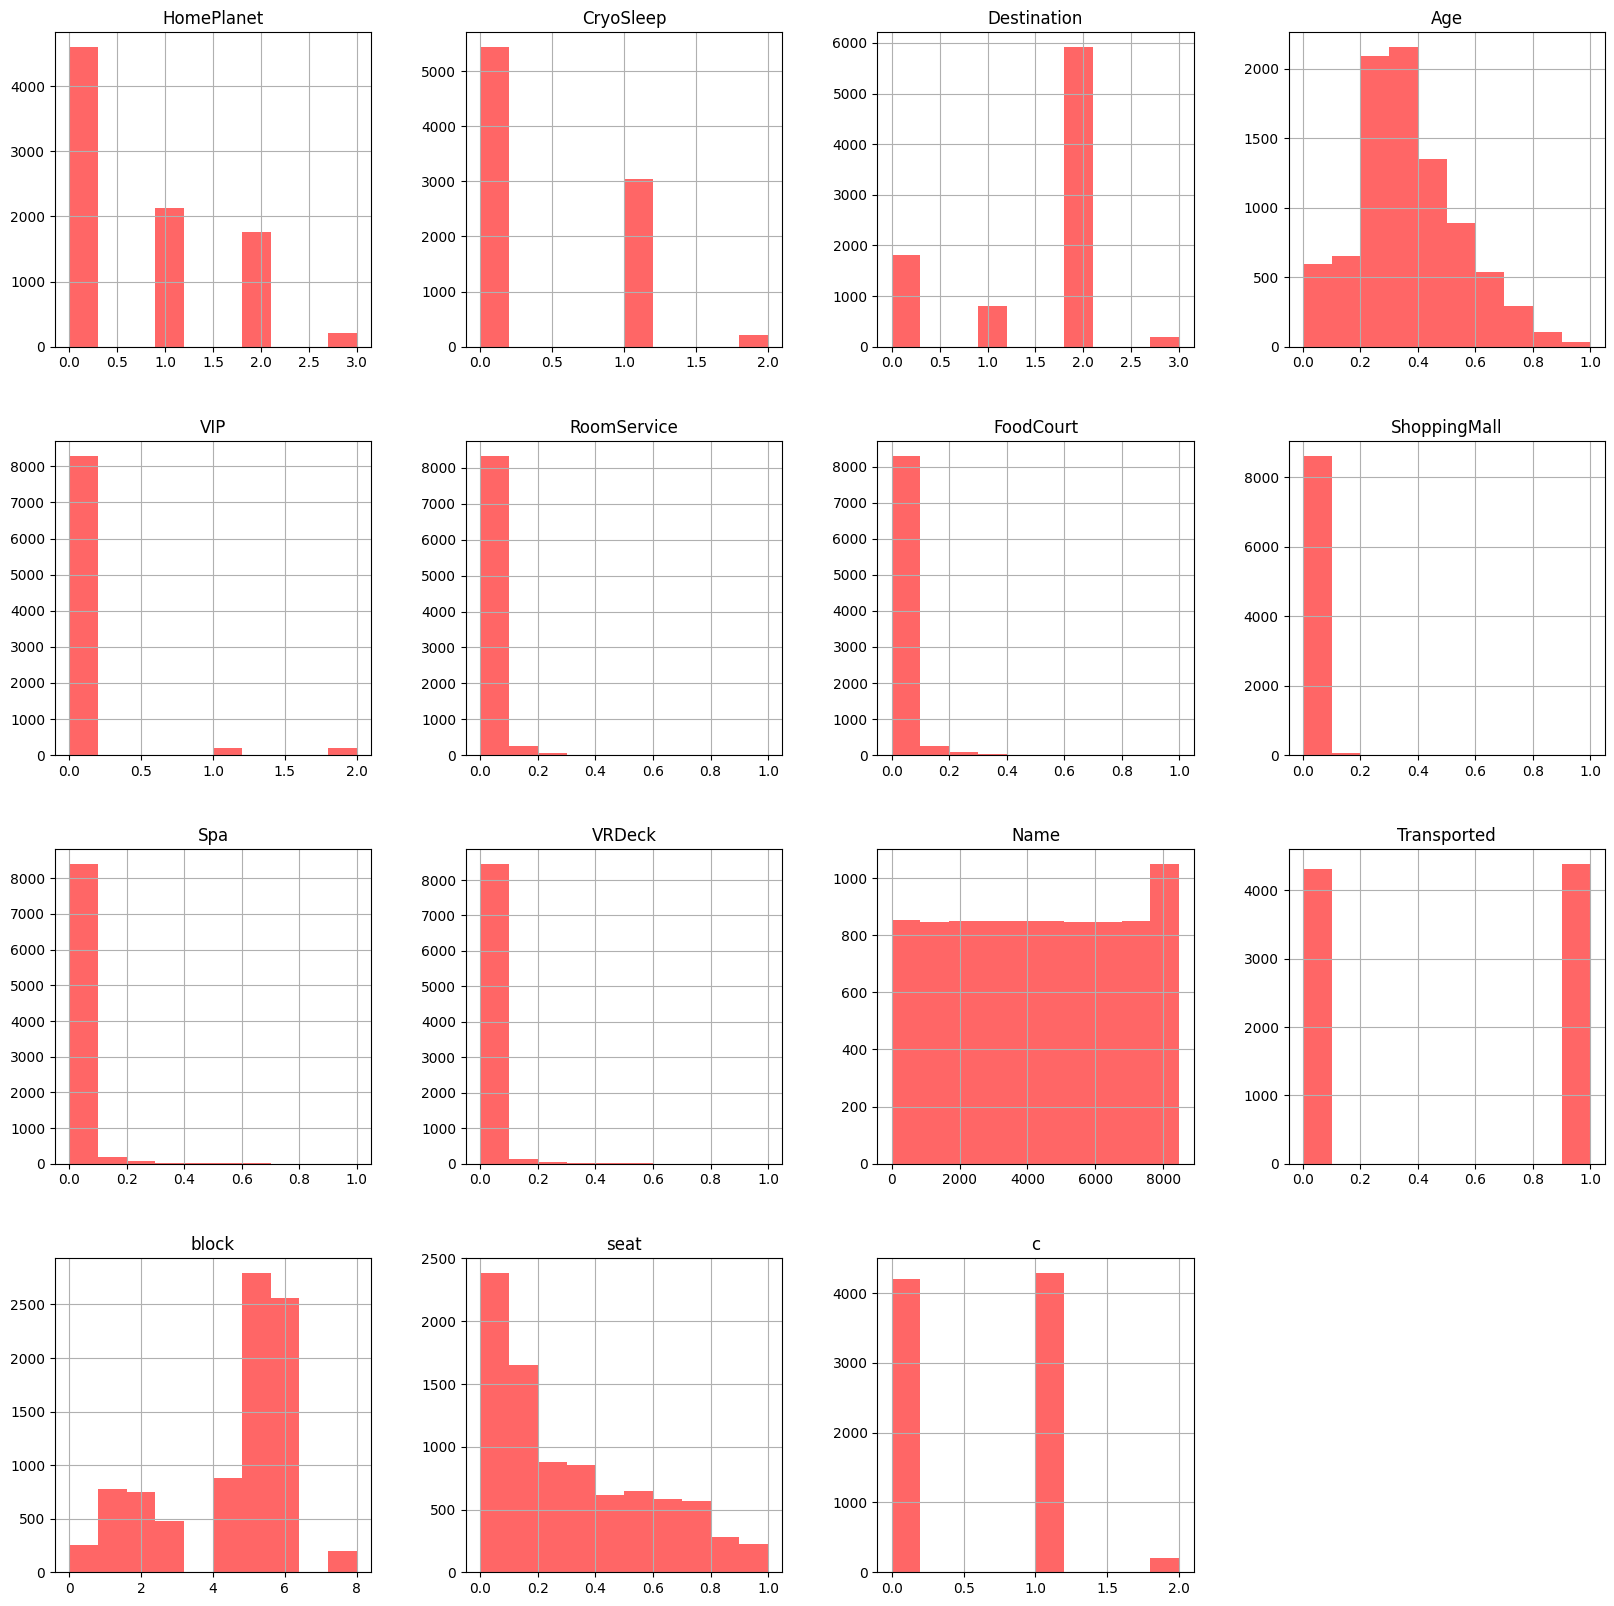

In [10]:
df.hist(figsize = (20, 20), alpha = 0.6, color = 'r');

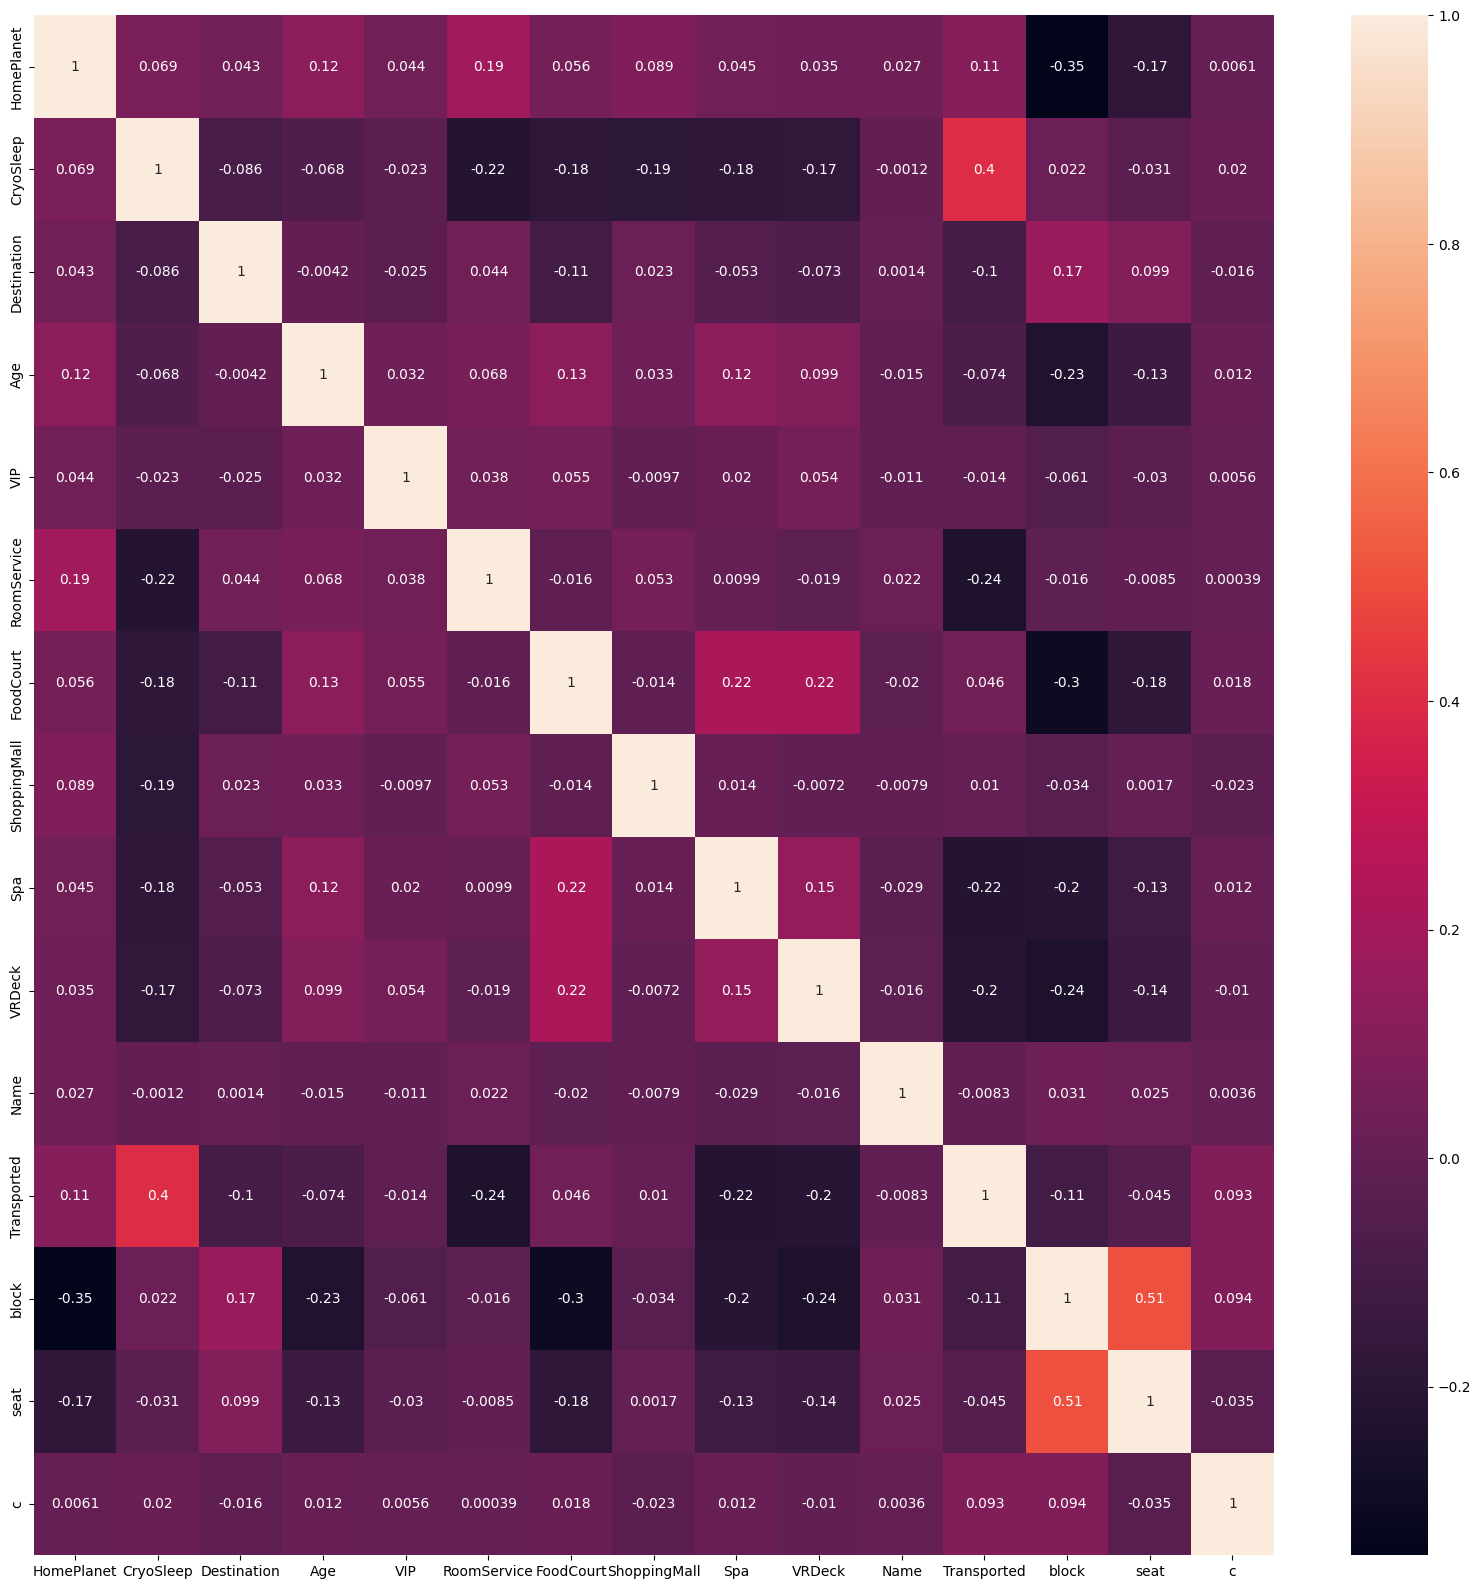

In [11]:
correl = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data = correl, annot = True);

# Spliting Data

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['Transported'], axis = 1)
y = df['Transported']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)
y_train

PassengerId
3868_04    1
1336_01    1
9193_01    0
5422_01    1
5076_01    0
          ..
4362_01    1
4678_01    0
7579_01    1
0460_01    1
8462_01    1
Name: Transported, Length: 6954, dtype: int64

# Models

## RFC

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

class RFC:
    def __init__(self, n_estimators, max_depth, min_samples_split):
#         self.n_estimators = n_estimators
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
        self.model = RandomForestClassifier(
            n_estimators = n_estimators,
            max_depth = max_depth,
            min_samples_split = min_samples_split,
            bootstrap=True
        )
                
    def fit(self, X, y):
        self.model.fit(X, y)
        
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        predictions = self.predict(X)
        return roc_auc_score(predictions, y)
    
# model.fit(X_train, y_train)
# pred = model.predict(X_valid)
# print(f'ROC AUC Score: {roc_auc_score(pred, y_valid)}')

## CatBoost

In [14]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

class CatBoostClass:
    def __init__(self, iterations, l_r, depth):
#         self.iterations = iterations
#         self.l_r = l_r
        self.model = CatBoostClassifier(
            iterations=iterations,
            learning_rate=l_r,
            depth = depth,  
            verbose=10
        )
        
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        predictions = self.predict(X)
        return roc_auc_score(y, predictions)

# GridSearchCV

## RFC

In [15]:
from sklearn.model_selection import GridSearchCV

rfc_params = {
    'n_estimators': range(50, 500, 50),
    'max_depth': [None, 10, 20],
    'min_samples_split': (2, 10, 2)
}

gs_rfc = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = rfc_params,
    scoring='roc_auc',
    cv=5
)

gs_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': (2, 10, 2),
                         'n_estimators': range(50, 500, 50)},
             scoring='roc_auc')

In [16]:
gs_rfc.score(X_train, y_train)

0.9898375402766039

In [17]:
rfc_best_params = gs_rfc.best_params_
rfc_best_params

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 350}

## CatBoost

In [18]:
cb_params = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [50, 100, 200]
}

gs_cb = GridSearchCV(
    estimator = CatBoostClassifier(verbose=False),
    param_grid = cb_params,
    scoring='roc_auc',
    cv = 5
)

gs_cb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7d0c8119b340>,
             param_grid={'depth': [6, 8, 10], 'iterations': [50, 100, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='roc_auc')

In [19]:
gs_cb.score(X_train, y_train)

0.9527134138876444

In [20]:
cb_best_params = gs_cb.best_params_
cb_best_params

{'depth': 6, 'iterations': 200, 'learning_rate': 0.1}

# Fitting Models

In [21]:
rfc_model = RFC(
    n_estimators = rfc_best_params['n_estimators'],
    max_depth = rfc_best_params['max_depth'],
    min_samples_split = rfc_best_params['min_samples_split']
)

rfc_model.fit(X_train, y_train)
rfc_score = rfc_model.score(X_valid, y_valid)
print('ROC AUC RFC: ', rfc_score)

ROC AUC RFC:  0.808600777860091


In [22]:
cbc_model = CatBoostClass(
    iterations = cb_best_params['iterations'],
    depth = cb_best_params['depth'],
    l_r = cb_best_params['learning_rate']
)

cbc_model.fit(X_train, y_train)
cbc_score = cbc_model.score(X_valid, y_valid)
print('ROC AUC CBC: ', cbc_score)

0:	learn: 0.6513014	total: 3.9ms	remaining: 776ms
10:	learn: 0.4797549	total: 38.4ms	remaining: 661ms
20:	learn: 0.4374995	total: 75.6ms	remaining: 645ms
30:	learn: 0.4155931	total: 113ms	remaining: 617ms
40:	learn: 0.4007981	total: 148ms	remaining: 576ms
50:	learn: 0.3891745	total: 183ms	remaining: 535ms
60:	learn: 0.3796993	total: 220ms	remaining: 502ms
70:	learn: 0.3717395	total: 265ms	remaining: 481ms
80:	learn: 0.3646961	total: 301ms	remaining: 443ms
90:	learn: 0.3582203	total: 341ms	remaining: 409ms
100:	learn: 0.3515411	total: 380ms	remaining: 373ms
110:	learn: 0.3447876	total: 421ms	remaining: 338ms
120:	learn: 0.3386921	total: 462ms	remaining: 302ms
130:	learn: 0.3327239	total: 503ms	remaining: 265ms
140:	learn: 0.3270558	total: 544ms	remaining: 228ms
150:	learn: 0.3213909	total: 583ms	remaining: 189ms
160:	learn: 0.3158096	total: 624ms	remaining: 151ms
170:	learn: 0.3112484	total: 659ms	remaining: 112ms
180:	learn: 0.3061008	total: 699ms	remaining: 73.4ms
190:	learn: 0.301439

In [23]:
scores = {'ROC AUC':[rfc_score, cbc_score]}
score_df = pd.DataFrame(data = scores, index = ['RandomForestClassifier', 'CatBoostClassifier'])
score_df

,ROC AUC
RandomForestClassifier,0.808601
CatBoostClassifier,0.811358


# Make Predictions

In [24]:
df_test = pd.read_csv('/kaggle/input/spaceship-titanic-in-all-probability/test.csv', index_col = 'PassengerId')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 434.4+ KB


In [25]:
df_test = preprocessing(df_test)
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,block,seat,c
PassengerId,,,,,,,,,,,,,,
0013_01,0,1,2,0.341772,0,0.000000,0.000000,0.00000,0.000000,0.000000,2912,6,0.001587,1
0018_01,0,0,2,0.240506,0,0.000000,0.000356,0.00000,0.142260,0.000000,2406,5,0.002116,1
0019_01,1,1,0,0.392405,0,0.000000,0.000000,0.00000,0.000000,0.000000,3376,2,0.000000,1
0021_01,1,0,2,0.481013,0,0.000000,0.263206,0.00000,0.009121,0.026266,2711,2,0.000529,1
0023_01,0,0,2,0.253165,0,0.000865,0.000000,0.07658,0.000000,0.000000,668,5,0.002646,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0,1,2,0.430380,0,0.000000,0.000000,0.00000,0.000000,0.000000,2105,6,0.791534,1
9269_01,0,0,2,0.531646,0,0.000000,0.033514,0.00205,0.000504,0.006466,2654,8,0.322846,2
9271_01,2,1,0,0.362761,0,0.000000,0.000000,0.00000,0.000000,0.000000,2085,3,0.156614,0


In [26]:
test_predictions = cbc_model.predict(df_test)
pd.DataFrame({'PassengerId': df_test.index, 'Transported': test_predictions})

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [27]:
submission_df = pd.DataFrame({'PassengerId': df_test.index, 'Transported': test_predictions})
submission_df.to_csv('submission_1.csv', index=False)